In [1]:
import numpy as np

# Replace 'filename.dat' with your actual file name
data = np.loadtxt('../Sim_Data/Al2O3_Al_athermal/Er_noise.dat')

# Check the shape of the data
print("Shape:", data.shape)


Shape: (16384, 2)


Er_noise.dat shape: (16384, 2)


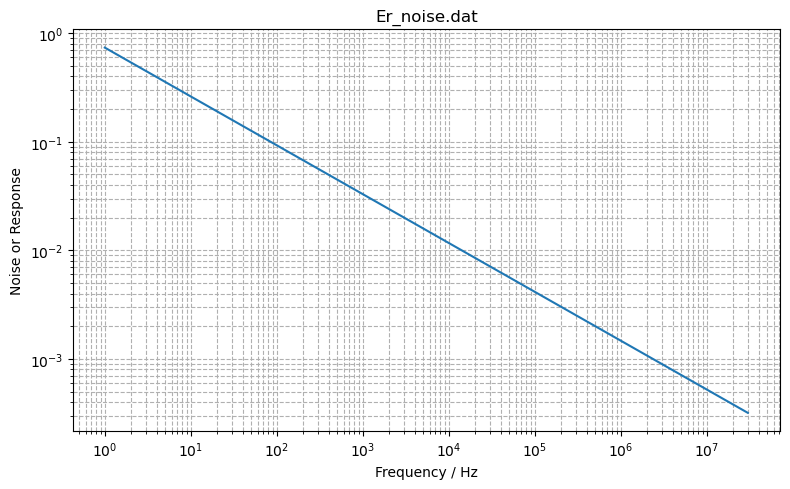

Johnson_noise.dat shape: (16384, 2)


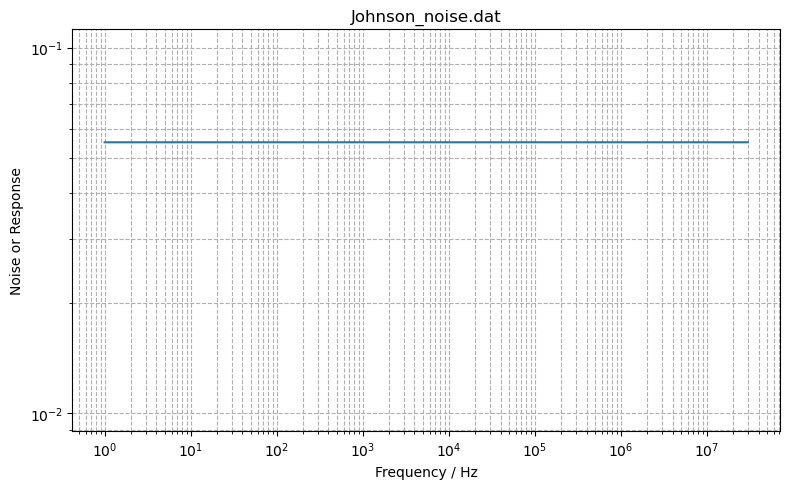

SQUID_noise.dat shape: (16384, 2)


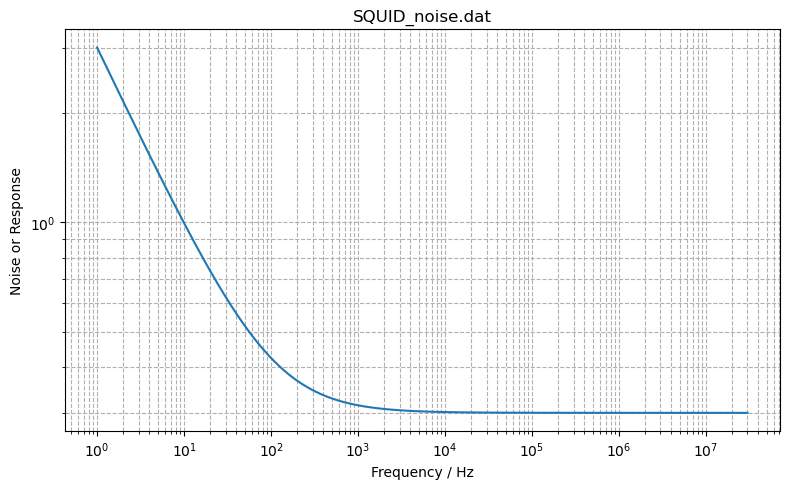

TD_noise.dat shape: (16384, 2)


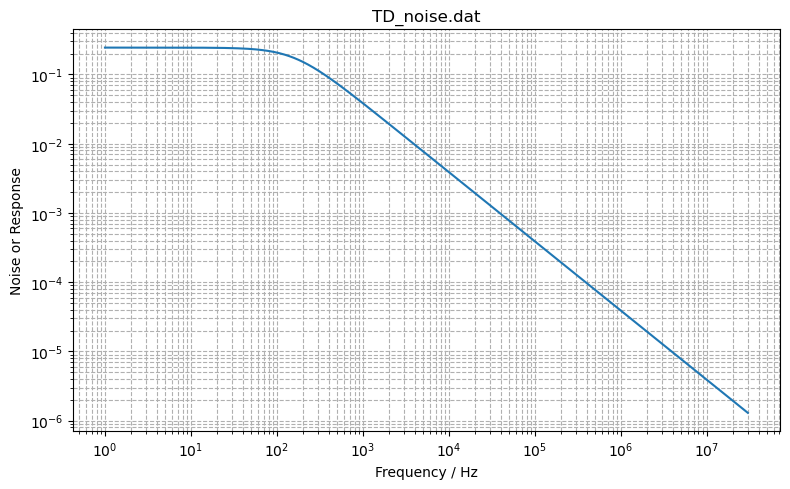

signal.dat shape: (16384, 2)


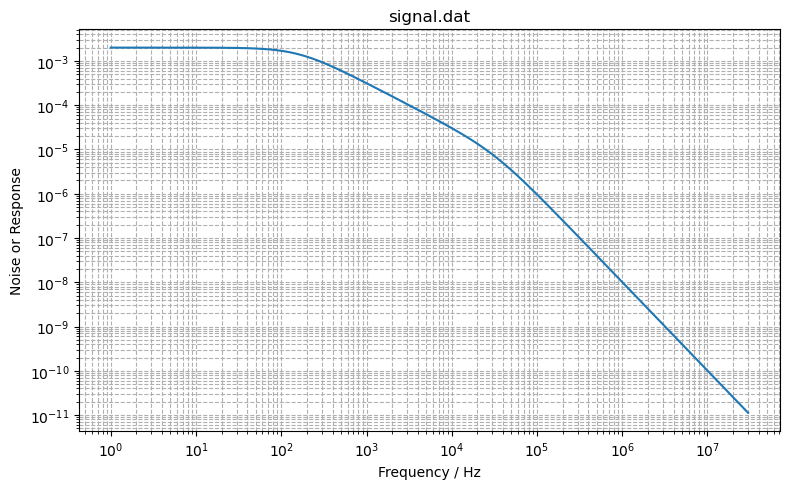

total_noise.dat shape: (16384, 2)


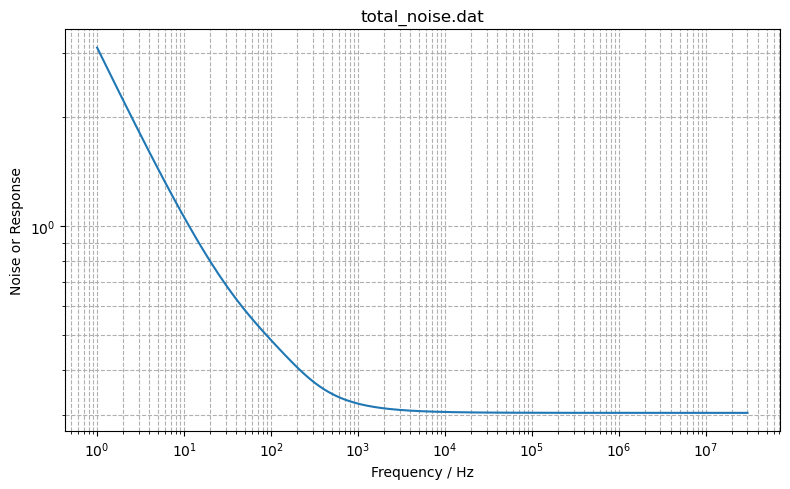

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_path = '../Sim_Data/Al2O3_Al_athermal/'

# List of your .dat files with full paths
dat_files = [
    "Er_noise.dat",
    "Johnson_noise.dat",
    "SQUID_noise.dat",
    "TD_noise.dat",
    "signal.dat",
    "total_noise.dat"
]

# Loop through and plot each one
for fname in dat_files:
    full_path = os.path.join(base_path, fname)

    # Load the data
    data = np.loadtxt(full_path)

    # Confirm shape
    print(f"{fname} shape: {data.shape}")

    # Extract columns
    freq = data[:, 0]
    values = data[:, 1]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.loglog(freq, values)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Noise or Response")
    plt.title(fname)
    plt.grid(True, which='both', ls='--')
    plt.tight_layout()
    plt.show()


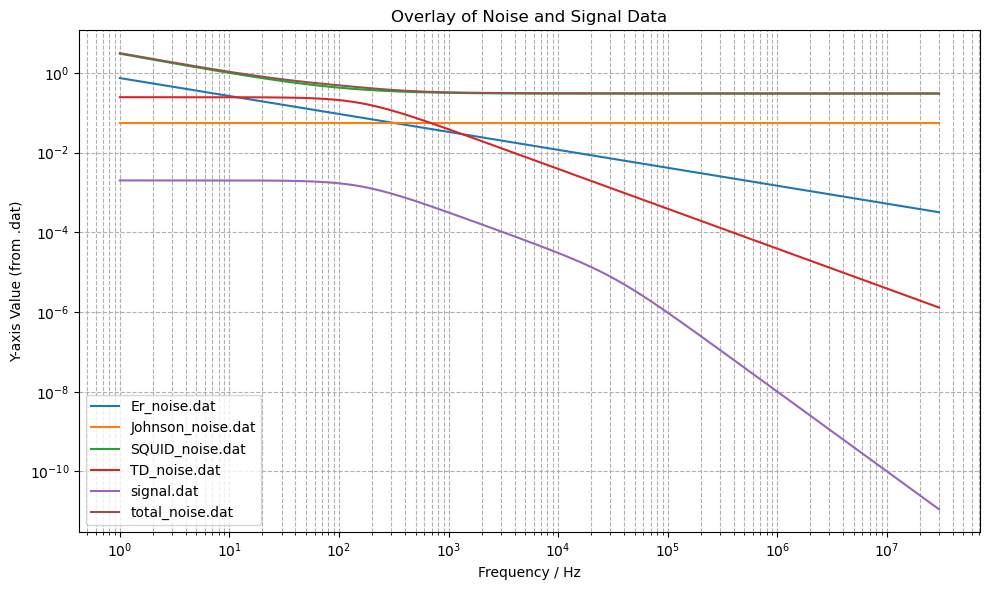

array([0.73772077, 0.73737199, 0.73702337, 0.73667491, 0.73632662])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base path and list of files
base_path = "../Sim_Data/Al2O3_Al_athermal/"
file_names = [
    "Er_noise.dat",
    "Johnson_noise.dat",
    "SQUID_noise.dat",
    "TD_noise.dat",
    "signal.dat",
    "total_noise.dat"
]

# Prepare to load and plot all data
plt.figure(figsize=(10, 6))
data_dict = {}

for fname in file_names:
    full_path = os.path.join(base_path, fname)
    try:
        data = np.loadtxt(full_path)
        freq, values = data[:, 0], data[:, 1]
        data_dict[fname] = (freq, values)
        plt.loglog(freq, values, label=fname)
    except Exception as e:
        print(f"Could not read {fname}: {e}")

# Format plot
plt.xlabel("Frequency / Hz")
plt.ylabel("Y-axis Value (from .dat)")
plt.title("Overlay of Noise and Signal Data")
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Show one example of Y-axis values
first_file = "Er_noise.dat"
example_values = data_dict[first_file][1]
example_values[:5]  # Display a preview of the first few Y-axis values



In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded .npy files
templates = np.load("../templates/default_templates.npy")
templates_individual = np.load("../templates/default_templates_individualchannel.npy")

# Check the shape of the arrays
templates_shape = templates.shape
templates_individual_shape = templates_individual.shape

templates_shape, templates_individual_shape


((2, 16384), (67, 16384))

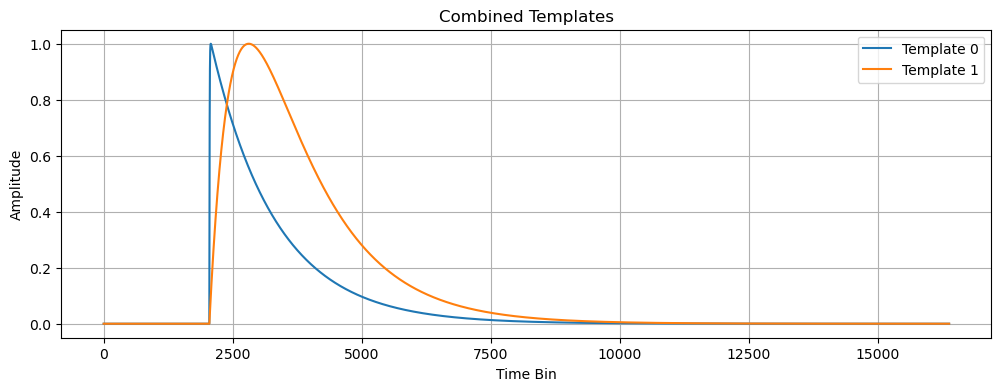

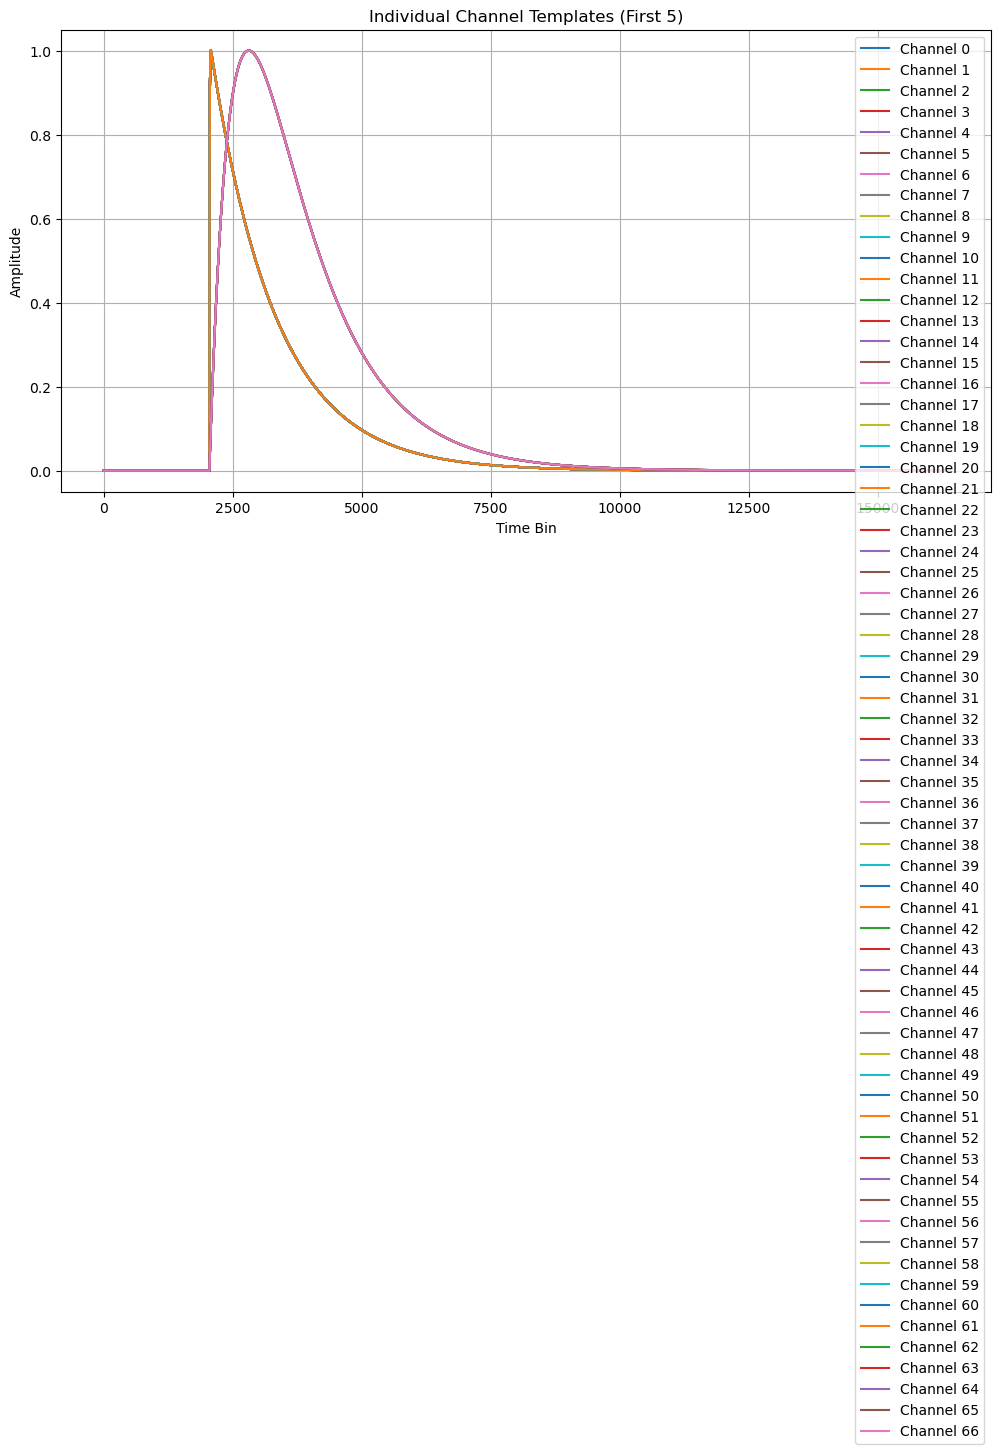

In [10]:
# Plot the two combined templates
plt.figure(figsize=(12, 4))
for i in range(templates.shape[0]):
    plt.plot(templates[i], label=f'Template {i}')
plt.title("Combined Templates")
plt.xlabel("Time Bin")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot a subset of individual channel templates (first 5)
plt.figure(figsize=(12, 6))
for i in range(67):
    plt.plot(templates_individual[i], label=f'Channel {i}')
plt.title("Individual Channel Templates (First 5)")
plt.xlabel("Time Bin")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
mean_first_2048 = np.mean(templates[1, :2048])
print("Mean of first 2048 samples of templates[1]:", mean_first_2048)


Mean of first 2048 samples of templates[1]: 0.0


In [12]:
templates = np.load("default_templates.npy")


In [13]:
templates.shape

(2, 16384)

In [14]:
import numpy as np
from scipy.interpolate import interp1d

# Original template: 16384 points
template_orig = templates[1]

# Original and target time indices
x_old = np.linspace(0, 1, 16384)
x_new = np.linspace(0, 1, 32768)

# Interpolate
interp_func = interp1d(x_old, template_orig, kind='cubic')  # 'linear' or 'cubic' or 'quadratic'
template_upsampled = interp_func(x_new)

# template_upsampled now has shape (32768,)


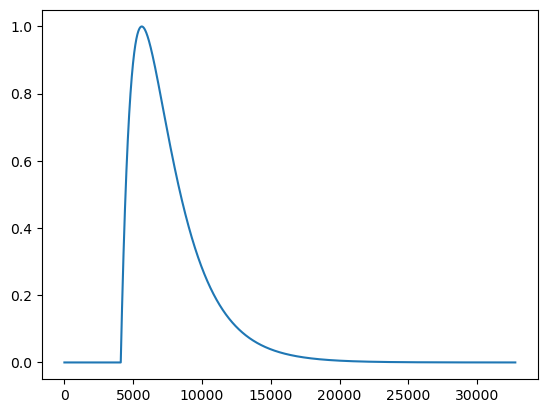

In [15]:
plt.plot(template_upsampled)

In [17]:
np.mean(template_upsampled[:2048])

0.0

In [19]:
np.save('template_qp_toy.npy', template_upsampled)

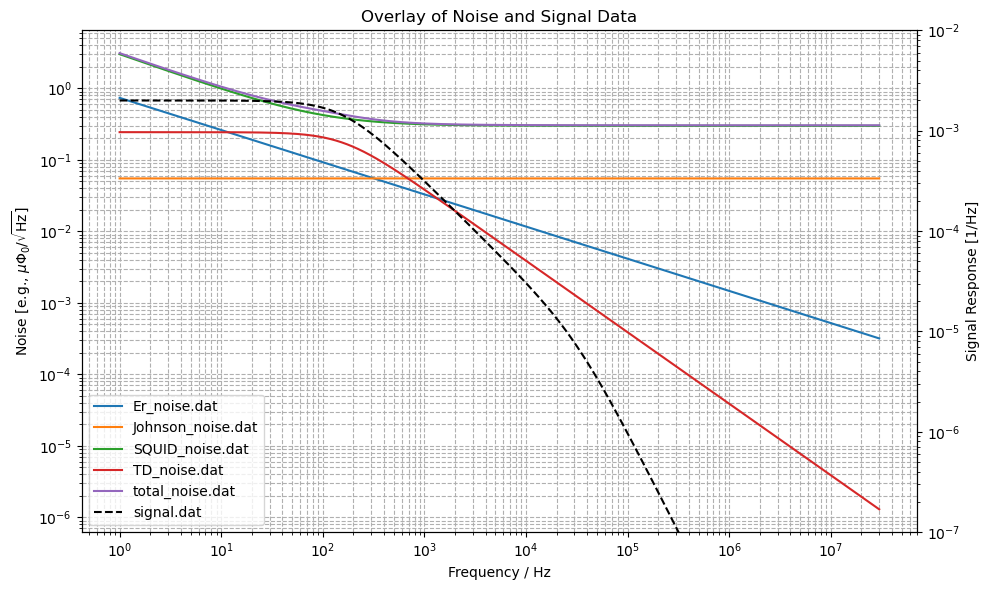

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base path and list of files
base_path = "../Sim_Data/Al2O3_Al_athermal/"
file_names = [
    "Er_noise.dat",
    "Johnson_noise.dat",
    "SQUID_noise.dat",
    "TD_noise.dat",
    "total_noise.dat"
]

signal_file = "signal.dat"

# Prepare to load and plot noise data
fig, ax1 = plt.subplots(figsize=(10, 6))
data_dict = {}

# Plot noise data on the left Y-axis
for fname in file_names:
    full_path = os.path.join(base_path, fname)
    try:
        data = np.loadtxt(full_path)
        freq, values = data[:, 0], data[:, 1]
        data_dict[fname] = (freq, values)
        ax1.loglog(freq, values, label=fname)
    except Exception as e:
        print(f"Could not read {fname}: {e}")

# Format left axis (noise)
ax1.set_xlabel("Frequency / Hz")
ax1.set_ylabel("Noise [e.g., $\\mu\\Phi_0/\\sqrt{\\mathrm{Hz}}$]")
ax1.grid(True, which='both', linestyle='--')

# Plot signal data on a second Y-axis
ax2 = ax1.twinx()
try:
    signal_data = np.loadtxt(os.path.join(base_path, signal_file))
    freq_sig, values_sig = signal_data[:, 0], signal_data[:, 1]
    data_dict[signal_file] = (freq_sig, values_sig)
    ax2.loglog(freq_sig, values_sig, label=signal_file, color='black', linestyle='--')
    ax2.set_ylabel("Signal Response [1/Hz]")
    ax2.set_ylim(1e-7, 1e-2)  # Set desired y-scale for signal
except Exception as e:
    print(f"Could not read {signal_file}: {e}")

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

plt.title("Overlay of Noise and Signal Data")
plt.tight_layout()
plt.show()


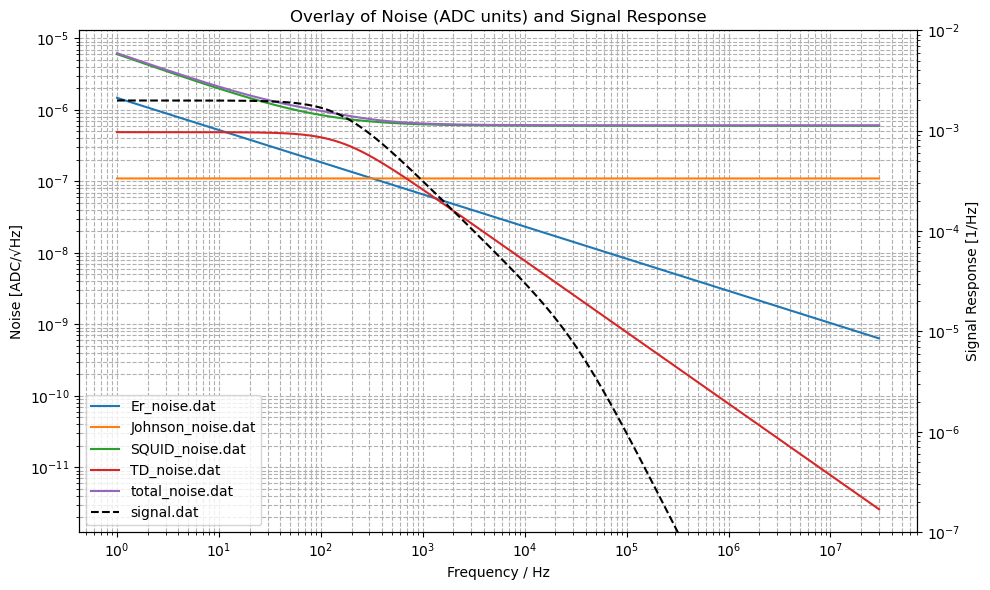

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Conversion function
def flux_noise_to_adc(flux_noise_uPhi0):
    """
    Convert flux noise (in μΦ₀/√Hz) to ADC counts/√Hz.
    Assumes: 1 Φ₀ = 1 V and 1 V = 2 ADC counts.
    """
    return flux_noise_uPhi0 * 2e-6

# Base path and list of files
base_path = "../Sim_Data/Al2O3_Al_athermal/"
file_names = [
    "Er_noise.dat",
    "Johnson_noise.dat",
    "SQUID_noise.dat",
    "TD_noise.dat",
    "total_noise.dat"
]

signal_file = "signal.dat"

# Prepare to load and plot noise data
fig, ax1 = plt.subplots(figsize=(10, 6))
data_dict = {}

# Plot noise data on the left Y-axis (converted to ADC)
for fname in file_names:
    full_path = os.path.join(base_path, fname)
    try:
        data = np.loadtxt(full_path)
        freq, values_flux = data[:, 0], data[:, 1]
        values_adc = flux_noise_to_adc(values_flux)
        data_dict[fname] = (freq, values_adc)
        ax1.loglog(freq, values_adc, label=fname)
    except Exception as e:
        print(f"Could not read {fname}: {e}")

# Format left axis (ADC noise)
ax1.set_xlabel("Frequency / Hz")
ax1.set_ylabel("Noise [ADC/√Hz]")
ax1.grid(True, which='both', linestyle='--')

# Plot signal data on a second Y-axis
ax2 = ax1.twinx()
try:
    signal_data = np.loadtxt(os.path.join(base_path, signal_file))
    freq_sig, values_sig = signal_data[:, 0], signal_data[:, 1]
    data_dict[signal_file] = (freq_sig, values_sig)
    ax2.loglog(freq_sig, values_sig, label=signal_file, color='black', linestyle='--')
    ax2.set_ylabel("Signal Response [1/Hz]")
    ax2.set_ylim(1e-7, 1e-2)  # Set desired y-scale for signal
except Exception as e:
    print(f"Could not read {signal_file}: {e}")

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

plt.title("Overlay of Noise (ADC units) and Signal Response")
plt.tight_layout()
plt.show()


In [3]:
for fname in file_names:
    full_path = os.path.join(base_path, fname)
    try:
        data = np.loadtxt(full_path)
        freq, values_flux = data[:, 0], data[:, 1]
        values_adc = flux_noise_to_adc(values_flux)
        psd_adc = values_adc**2  # Now in ADC²/Hz
        data_dict[fname] = (freq, psd_adc)
        ax1.loglog(freq, psd_adc, label=fname)
    except Exception as e:
        print(f"Could not read {fname}: {e}")

ax1.set_ylabel("Power Spectral Density [ADC²/Hz]")


Text(24.000000000000007, 0.5, 'Power Spectral Density [ADC²/Hz]')